In [1]:
import pandas as pd
customer_df = pd.read_csv(filepath_or_buffer='/kaggle/input/4-year-historical-sales-data/master_customer.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    793 non-null    object
 1   Customer_Name  793 non-null    object
 2   Segment        793 non-null    object
 3   Country        793 non-null    object
 4   City           793 non-null    object
 5   State          793 non-null    object
 6   Postal_Code    793 non-null    int64 
 7   Region         793 non-null    object
 8   Age            793 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 55.9+ KB


In [2]:
customer_df.head()

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Age
0,CG/12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
1,DV/13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,47
2,SO/20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,19
3,BH/11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,39
4,AA/10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,31


In [3]:
product_df = pd.read_csv(filepath_or_buffer='/kaggle/input/4-year-historical-sales-data/master_product.csv')
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    1861 non-null   object
 1   Category      1861 non-null   object
 2   Sub_Category  1861 non-null   object
 3   Product_Name  1861 non-null   object
dtypes: object(4)
memory usage: 58.3+ KB


In [4]:
product_df.head()

,Product_ID,Category,Sub_Category,Product_Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [5]:
store_df = pd.read_csv(filepath_or_buffer='/kaggle/input/4-year-historical-sales-data/store_data.csv', parse_dates=['Order_Date', 'Ship_Date'])
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row_ID       9800 non-null   int64         
 1   Order_ID     9800 non-null   object        
 2   Order_Date   9800 non-null   datetime64[ns]
 3   Ship_Date    9800 non-null   datetime64[ns]
 4   Ship_Mode    9800 non-null   object        
 5   Customer_ID  9800 non-null   object        
 6   Product_ID   9800 non-null   object        
 7   Sales        9770 non-null   float64       
 8   Discount     9800 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 689.2+ KB


In [6]:
store_df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV/13045,OFF-LA-10000240,219300.0,0.01
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO/20335,FUR-TA-10000577,14363662.5,0.02
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO/20335,OFF-ST-10000760,335520.0,0.03


We have loaded the three datasets; we can join the stores and products on their common key

In [7]:
store_product_df = store_df.merge(right=product_df, on='Product_ID')
store_product_df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount,Category,Sub_Category,Product_Name
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,5400,CA-2017-117681,2017-04-09,2017-04-14,Standard Class,HF/14995,FUR-BO-10001798,8349975.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,8635,CA-2018-159793,2018-08-25,2018-08-29,Standard Class,SV/20365,FUR-BO-10001798,1964700.0,0.01,Furniture,Bookcases,Bush Somerset Collection Bookcase
3,9335,CA-2018-110198,2018-05-01,2018-05-02,First Class,AG/10900,FUR-BO-10001798,4715280.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase
4,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."


Similarly we can join on the customer ID to get complete records for each sale.

In [8]:
df = store_product_df.merge(right=customer_df, on='Customer_ID')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Discount,Category,Sub_Category,Product_Name,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Age
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-BO-10001798,3929400.0,0.02,Furniture,Bookcases,Bush Somerset Collection Bookcase,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG/12520,FUR-CH-10000454,10979100.0,0.01,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
2,5492,CA-2018-164098,2018-01-26,2018-01-27,First Class,CG/12520,OFF-ST-10000615,272400.0,0.02,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
3,6878,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG/12520,FUR-FU-10004952,1970640.0,0.03,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42
4,6879,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG/12520,OFF-PA-10003001,80160.0,0.02,Office Supplies,Paper,Xerox 1986,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,42


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Product_ID     9800 non-null   object        
 7   Sales          9770 non-null   float64       
 8   Discount       9800 non-null   float64       
 9   Category       9800 non-null   object        
 10  Sub_Category   9800 non-null   object        
 11  Product_Name   9800 non-null   object        
 12  Customer_Name  9800 non-null   object        
 13  Segment        9800 non-null   object        
 14  Country        9800 non-null   object        
 15  City           9800 n

In [10]:
df.nunique()

Row_ID           9800
Order_ID         4922
Order_Date       1230
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Product_ID       1861
Sales            5735
Discount            3
Category            3
Sub_Category       17
Product_Name     1817
Customer_Name     793
Segment             3
Country             1
City              252
State              41
Postal_Code       314
Region              4
Age                30
dtype: int64

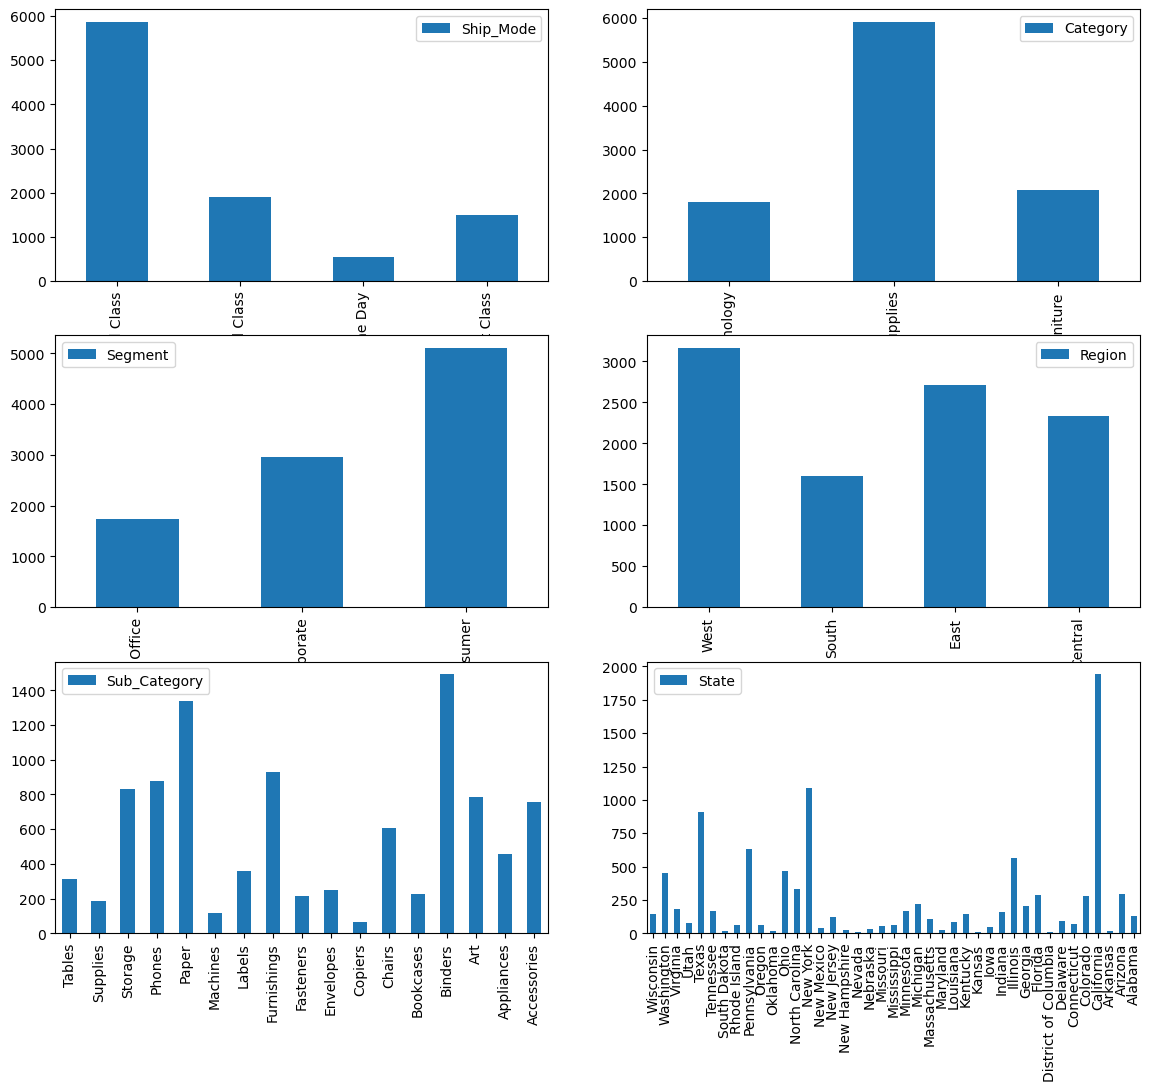

In [11]:
from matplotlib.pyplot import subplots
categorical = ['Ship_Mode', 'Category',  'Segment', 'Region', 'Sub_Category', 'State']
fig, ax = subplots(figsize=(14, 12), ncols=2, nrows=3)
for index, column in enumerate(categorical):
    df[column].value_counts().to_frame().sort_index(ascending=False).plot(ax=ax.ravel()[index], kind='bar', legend=True)

<Axes: ylabel='Frequency'>

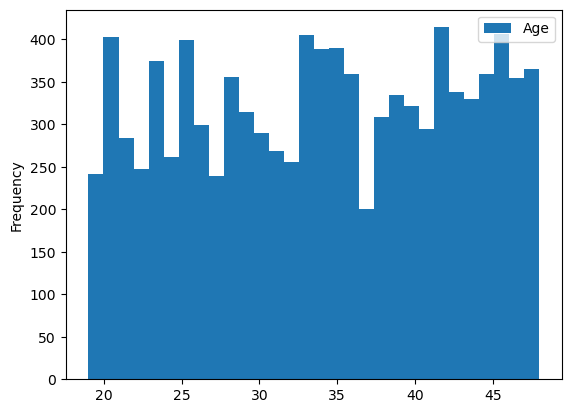

In [12]:
df['Age'].plot.hist(bins=30, legend=True)